# IMPORT

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import os
import pandas as pd
import seaborn as sns


# READFILE

In [36]:
PATH  = Path.cwd() / 'Data/penguins.csv'
DATA = pd.read_csv(PATH)
DATA

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [37]:
DATA.describe() #general for statistical values


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Variable Description**<br>
bill_length_mm: The length of penguin's bill 
bill_depth_mm: Depth of penguin's bill
flipper_length_mm: Length of penguin's flipper
body_mass_g: Body mass of the penguin
sex: Gender of the penguin

# ANYLIST FEATURES

In [38]:
print(DATA.columns.values)

['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


**Categorial Features**<br>


# DATA PREPROCESSING 

In [39]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())

Missing Values per Column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
------------------------------------
Infinity Values per Column:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


The answers is **YES**, There are some Passenger don't have Age or Cabin on this Titanic Ship. We will erase those all rows and collumns that is contains an error value.

In [40]:
#DATA.drop('Cabin', axis=1, inplace=True)
df_clean = DATA.dropna()
df_clean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


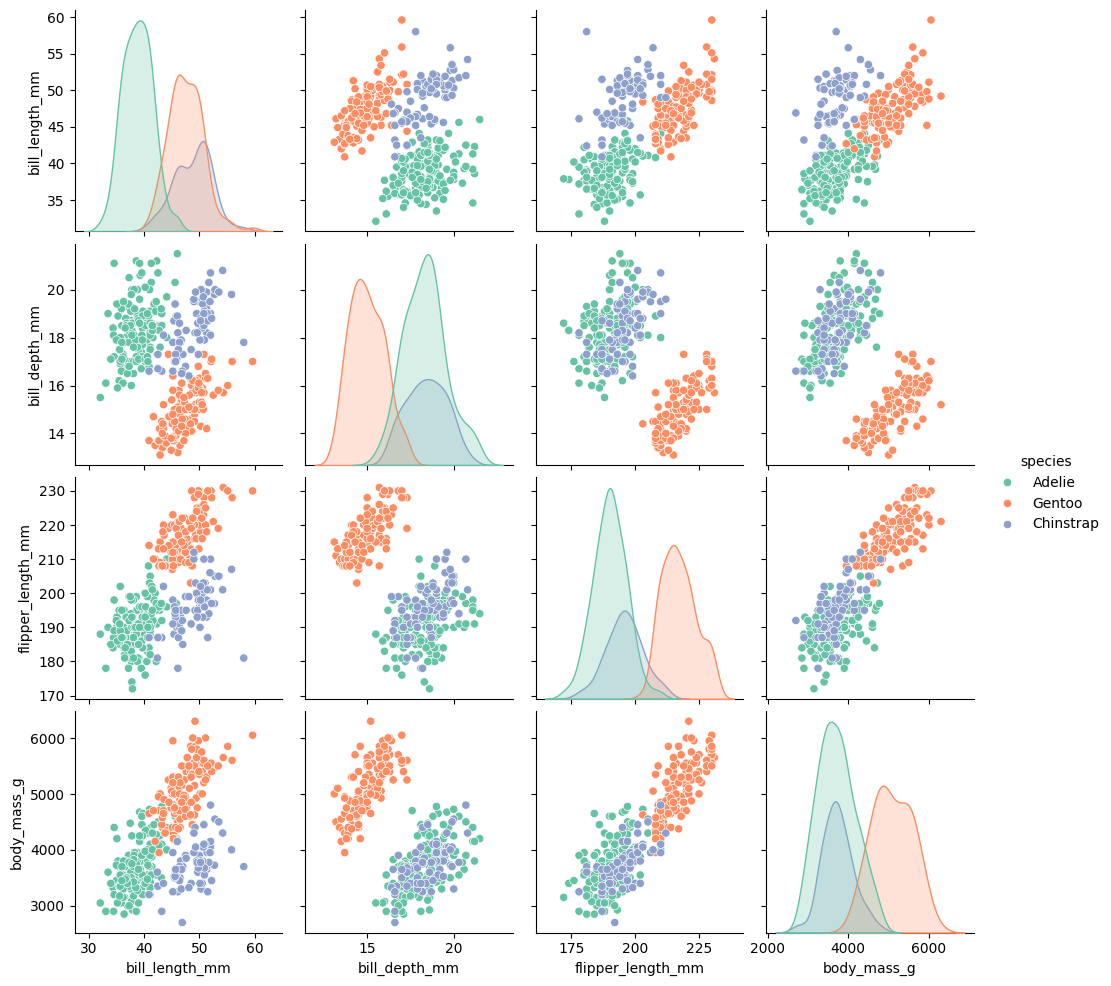

In [41]:
sns.pairplot(data = df_clean, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species', palette='Set2')
plt.show()

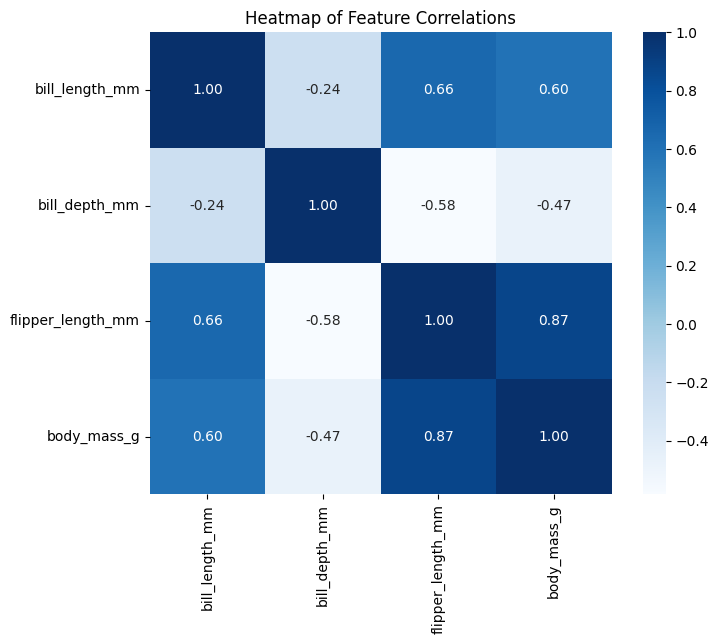

In [42]:
selected_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
corr = DATA[selected_columns].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

# ANYLIST CATEGORICAL DATA

In [43]:
import matplotlib.pyplot as plt
def histogram(variable):
    """
    input: variable ex:"Age"
    output: histogram & value count
    """
    # get feature
    var = DATA[variable]

    # count number of continuous variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.hist(var, bins=20, color='blue', alpha=0.7)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

def bar_plot(variable):
    """
    input: variable ex:"Sex"
    output: bar plot & value count
    """
    # get feature
    var = DATA[variable]

    # count number of categorical variable
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, varValue))

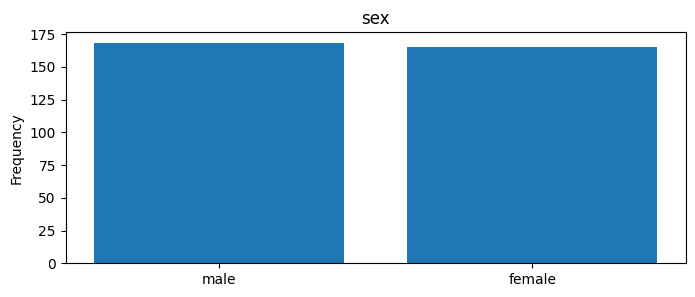

sex: 
sex
male      168
female    165
Name: count, dtype: int64


In [44]:
category1=['sex']
for c in category1:
    bar_plot(c)

# ANYLIST NUMERICAL DATA

In [45]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribituon with hist".format(variable))
    plt.show()

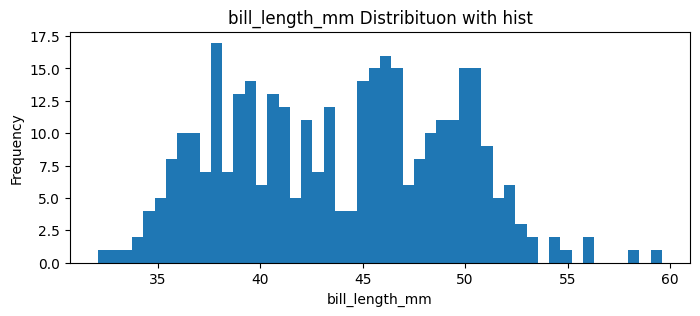

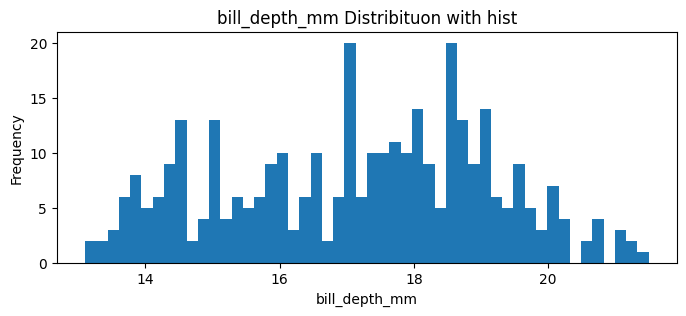

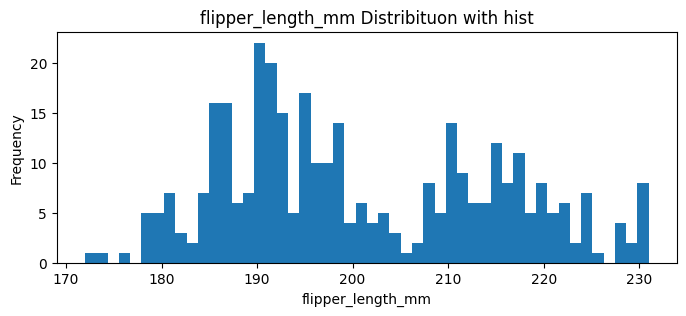

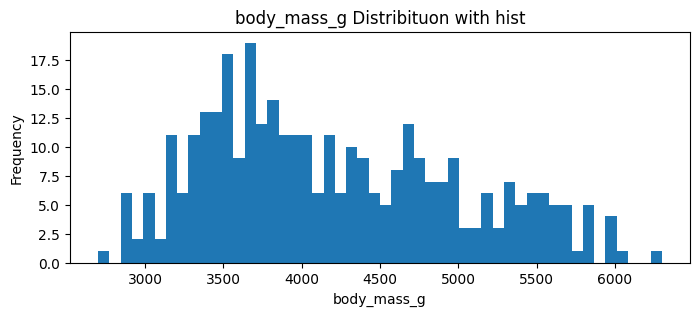

In [46]:
numericVar=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for n in numericVar:
    plot_hist(n)

# BASIC DATA ANYLIST

In this section I will use some Categorial Features to anylist and create a simple rating table for those features

In [47]:
DATA[['species']]


,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Chinstrap
340,Chinstrap
341,Chinstrap
342,Chinstrap


In [52]:
ratio = (
    DATA.groupby("sex")["species"]
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)
print(ratio)


species     Adelie  Chinstrap     Gentoo
sex                                     
female   44.242424  20.606061  35.151515
male     43.452381  20.238095  36.309524


# References

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions#Analyze-by-pivoting-features

https://www.kaggle.com/code/kaganaslan/titanic-eda-data-analysis#Fill-Missing-Value

https://machinelearningcoban.com/tabml_book/ch_data_processing/eda.html

Source Dataset<br>
https://www.kaggle.com/datasets/yasserh/titanic-dataset